In [64]:
using Plots
using Dates
pyplot(markershape= :circle)
using LinearAlgebra
using DelimitedFiles

In [65]:
# INFO about JOB data:
#scan over m and Ly for W= 0.0, nX= 100*Ly

dir_name="/home/anegi/August/3-Aug-19-09-49" #directory containing the JOB data

"/home/anegi/August/3-Aug-19-09-49"

In [99]:


m=readdlm(string(dir_name, "/m_list.txt"),' ');
W=readdlm(string(dir_name, "/W_list.txt"),' ');
Ly=Int64.(readdlm(string(dir_name, "/Ly_list.txt"),' '));
map=readdlm(string(dir_name, "/TaskID(#,pid,m,W,Ly).txt"),'\t');
λ_positive= zeros(length(Ly)*length(m)*length(W));  

In [109]:
for i in 1: length(m)*length(W)*length(Ly)
    λ_positive[i]= readdlm(string(dir_name, "/λ_list/λ(m,W,Ly)=",Int64(map[i,1])) )[Int64(map[i,5])]
end
  λ_positive

140-element Array{Float64,1}:
 0.17530238817731367  
 0.13823728149332587  
 0.10925999528499554  
 0.08954767531359699  
 0.07478622644182899  
 0.06525910403891132  
 0.05860347387680862  
 0.17187119700529319  
 0.13469309512934508  
 0.10557288436524748  
 0.08569970182491185  
 0.07074332294440074  
 0.061016839183326496 
 ⋮                    
 0.0494584455880267   
 0.029906439415960166 
 0.01576031948426501  
 0.0073817888001553745
 0.0026083874611022508
 0.1128327716225121   
 0.07558297458161124  
 0.046716789179553166 
 0.027485060321331547 
 0.013832471693708456 
 0.006061316741087205 
 0.0019552908707777747

In [113]:
# λ_positive: constant Ly in rows
λ_positive=reshape(λ_positive,7,20)
#write in a file
filename= string(dir_name,"/λ_list/λ_positive")
     writedlm(filename,λ_positive, ", ")

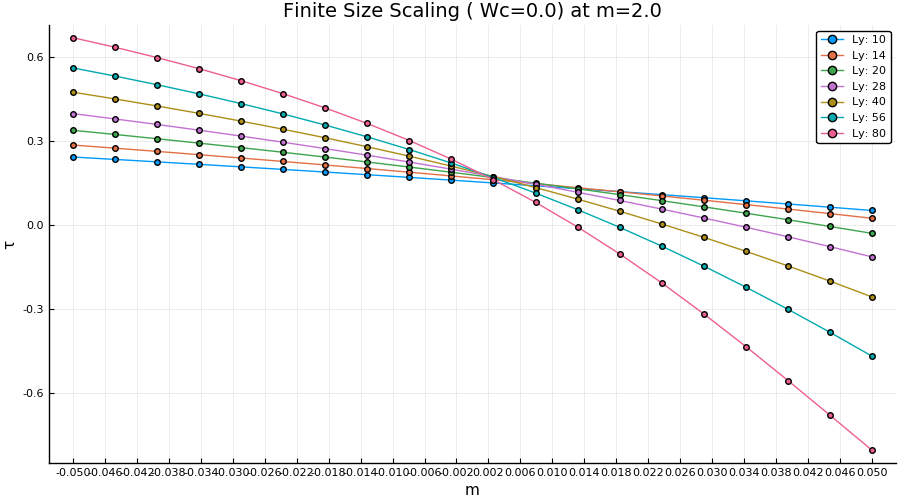

In [117]:

#PLOTTING

plot()
for i in (1:length(Ly))
    plt_name= string("Ly: ", Ly[i] )    
    plot!(m,log10.(λ_positive[i,:]*Ly[i]),label=plt_name,markershape= :circle,size=(900,500),xticks =-0.05:0.004:0.05)#,xlim=(2.0,2.4),ylim=(-1,1)) 
    
    #scatter!(w,model(w,T,ν,y,Ly[i]),markershape= :square)
 end

plt= plot!(xlabel="m",ylabel="τ",title=string("Finite Size Scaling ( Wc=", 0.0, ") at m=", 2.0,))
